In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#IMPORTING THE DATASET
data=pd.read_csv('Income_Taxes.csv')

In [3]:
#DATA EXPLORATION AND VISUALISATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Financial_Year  22 non-null     int64
 1   Income_Taxes    22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes


In [4]:
data.describe()

,Financial_Year,Income_Taxes
count,22.000000,22.000000
mean,2010.500000,224914.500000
std,6.493587,188261.745783
min,2000.000000,31764.000000
25%,2005.250000,69172.500000
50%,2010.500000,158219.500000
75%,2015.750000,334036.500000
max,2021.000000,696604.000000


<AxesSubplot:>

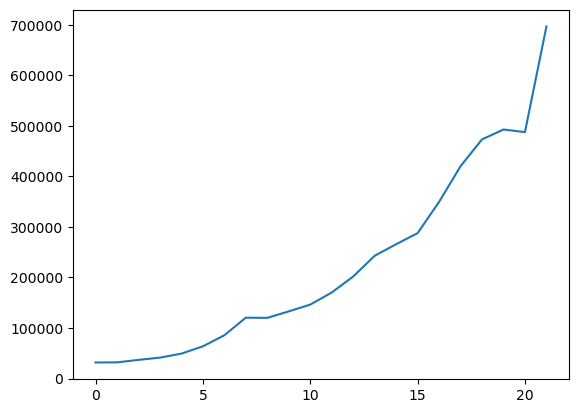

In [5]:
data_IT=data['Income_Taxes']
data_IT.plot()

In [11]:
#TEST-TRAIN SPLIT
msk=(data.index<len(data)-5)
data_train=data[msk].copy()
data_test=data[~msk].copy()
IT_Train=data_train['Income_Taxes']

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


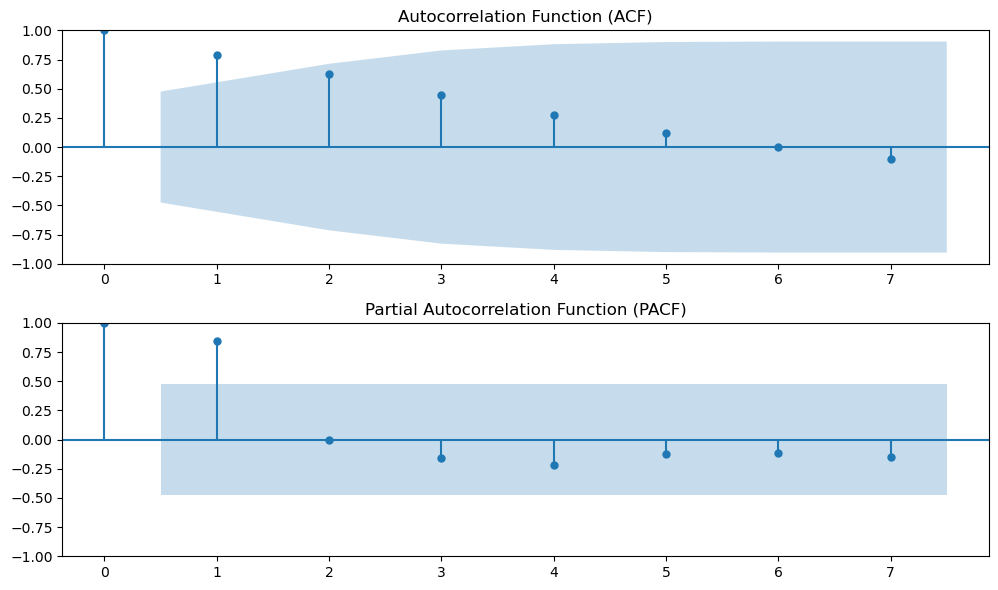

In [12]:
#CHECKING STATIONARITY OF THE TRAIN DATASET
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create ACF and PACF plots for the "Other Direct Taxes" series
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# ACF Plot
plot_acf(IT_Train, lags=7, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF Plot
plot_pacf(IT_Train, lags=7, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [13]:
#PERFORMING THE ADF TEST
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on "Other Direct Taxes"
adf_test = adfuller(IT_Train)

# Print the ADF test results
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"{key}: {value}")

ADF Statistic: 3.68207116885732
p-value: 1.0
Critical Values:
1%: -3.9240193847656246
5%: -3.0684982031250003
10%: -2.67389265625


<AxesSubplot:>

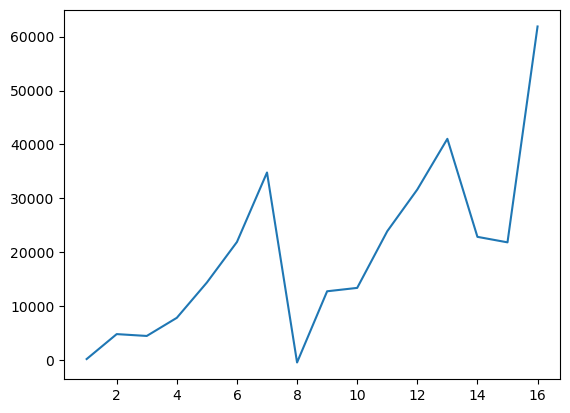

In [14]:
#DIFFERENCING TO MAKE THE DATA STATIONARY
data_train_diff = IT_Train.diff().dropna()
data_train_diff.plot()

In [15]:
adf_test = adfuller(data_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.9984557223151733


<AxesSubplot:>

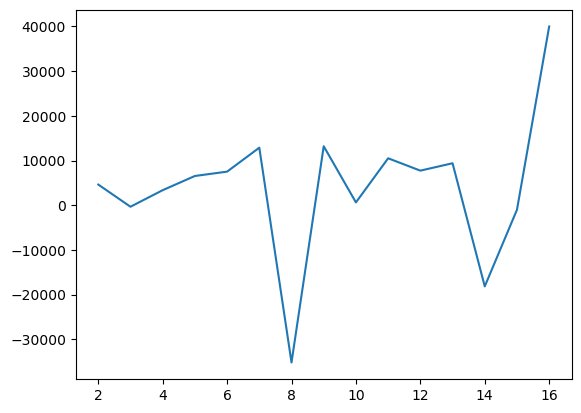

In [16]:
data_train_diff2 = data_train_diff.diff().dropna()
data_train_diff2.plot()

In [17]:
adf_test = adfuller(data_train_diff2)
print(f'p-value: {adf_test[1]}')

p-value: 0.01217857182761915


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


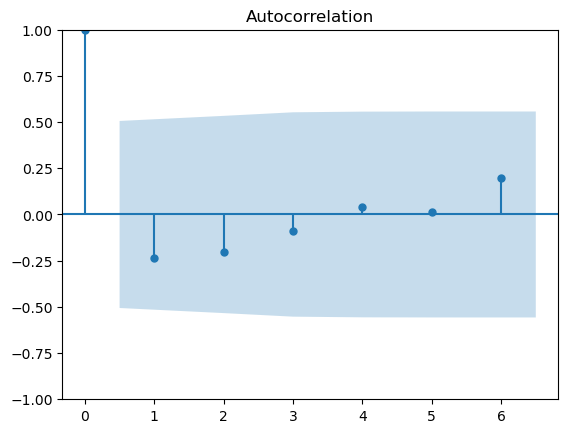

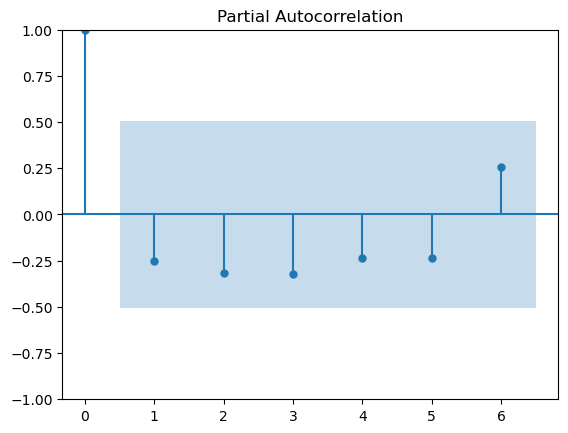

In [18]:
acf_diff = plot_acf(data_train_diff2, lags=6)
pacf_diff = plot_pacf(data_train_diff2, lags=6)

In [21]:
#ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(IT_Train, order=(2,2,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Income_Taxes   No. Observations:                   17
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -164.906
Date:                Sat, 07 Oct 2023   AIC                            339.811
Time:                        00:29:37   BIC                            343.352
Sample:                             0   HQIC                           339.774
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7814      2.189      0.357      0.721      -3.509       5.072
ar.L2         -0.5070      1.474     -0.344      0.731      -3.396       2.382
ma.L1         -1.3379      2.925     -0.457      0.6

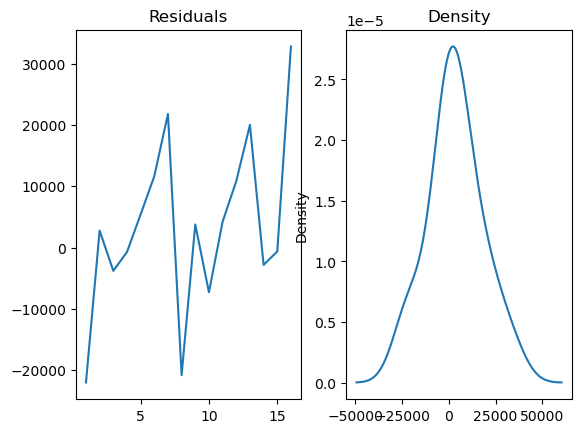

In [22]:
#RESIDUAL ANALYSIS
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


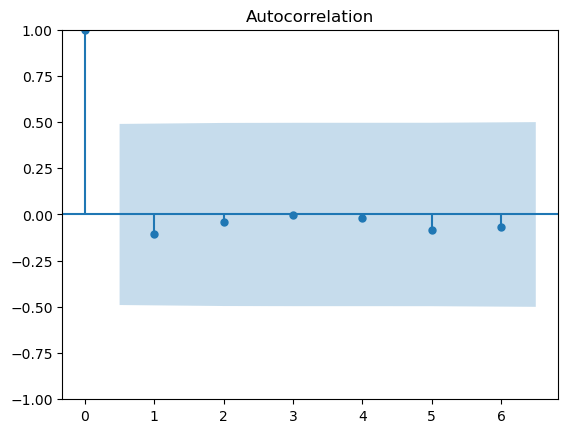

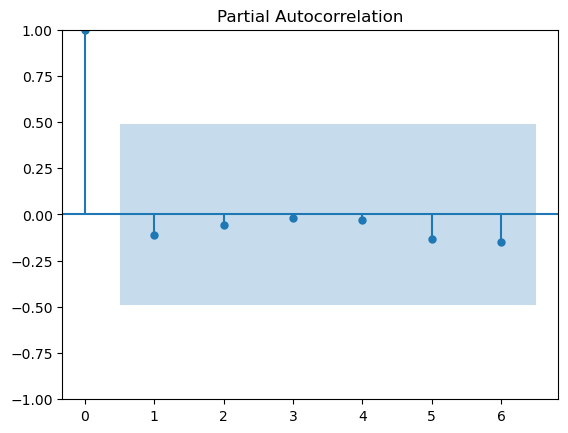

In [23]:
acf_res = plot_acf(residuals,lags=6)
pacf_res = plot_pacf(residuals,lags=6)

In [24]:
#FORECASTING
forecast_test = model_fit.forecast(len(data_test))
print(forecast_test)

17    398784.681713
18    442242.079270
19    487528.572199
20    537197.420872
21    589363.467898
Name: predicted_mean, dtype: float64
